[View in Colaboratory](https://colab.research.google.com/github/cinngyang/Python/blob/master/Statistics_Normal.ipynb)

# 分布

目的推估 WDD 良率

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

假設 mean=450 and std=1.6

In [0]:
nor_Wdd=np.random.normal(loc=450, scale=1.6,size=1000)

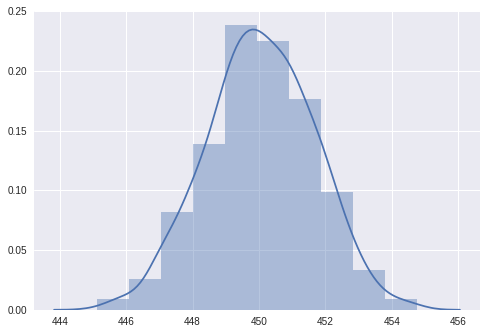

In [18]:
sns.set(style='darkgrid')
sns.distplot(nor_Wdd, bins = 10) 

RawData fit normal distrubation 

In [24]:
mu, std = norm.fit(nor_Wdd)
print(mu)
print(std)

450.05016289859566
1.617426272722734


# 機率分布

In [36]:
X = stats.norm(mu,std)
pdf=X.pdf([450]) # 概率密度函数 pdf，给定 x 值，给出密度函数的 y 值
cdf=X.cdf([450]) # 累积概率函数，其实是 pdf 积分，也就是密度曲线下的面积，整个的面积为 1
print('450 出現機率',pdf)
print('累計到 450 出現的機率',cdf)

450 出現機率 [0.24653393]
累計到 450 出現的機率 [0.48762918]


In [0]:
def plot_rv_distribution(X, axes=None):  
    """Plot the PDF, CDF, SF and PPF of a given random variable"""

    if axes is None:
        fig, axes = plt.subplots(1, 2, figsize=(8, 3))
    
    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)

    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)

    if hasattr(X.dist, 'pdf'): # 判断有没有 pdf，即是不是连续分布
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25) # alpha 是透明度，alpha=0 表示 100% 透明，alpha=100 表示完全不透明
    else: # 离散分布
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF") # pmf 和 pdf 是类似的
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    
    for ax in axes:
        ax.legend()
    
    return axes

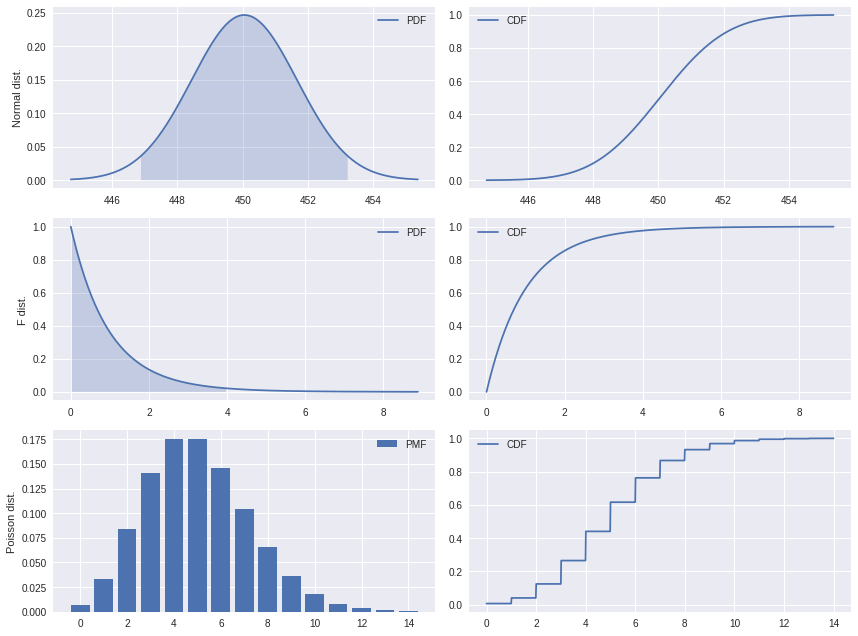

In [46]:
fig, axes = plt.subplots(3, 2, figsize=(12, 9)) # 画布，3 行 3 列

#X = stats.norm() # 标准正态分布
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50) # F 分布
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5) # 泊松分布
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")

fig.tight_layout()

累計機率分布

# 累計機率

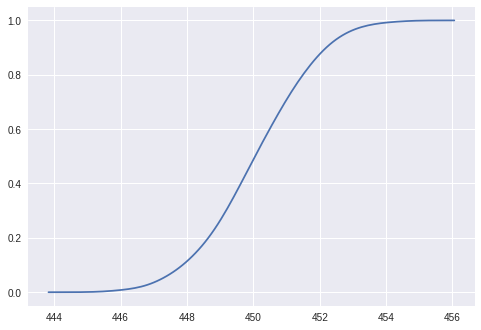

In [47]:
sns.distplot(nor_Wdd,kde_kws=dict(cumulative = True),hist=False)